In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import numpy as np
import pprint
import matplotlib.pyplot as plt
from ResoFit.experiment import Experiment
import peakutils as pku
from ResoFit.simulation import Simulation
from scipy import signal
import scipy
from ResoFit._utilities import Layer

In [2]:
%matplotlib notebook

In [3]:
folder = 'data/IPTS_21091/bragg_data_21091'
sample_name = ['sample 2', 'sample 3', 'sample 5', 'sample 6']
data_file = ['sample2.csv', 'sample3.csv', 'sample5.csv', 'sample6.csv']
spectra_file = 'TRISO_Spectra.txt'
# norm_to_file = ['blank.csv', 'blank.csv', 'blank.csv', 'blank.csv',]
norm_to_file = None
norm_factor = [1, 1, 1, 1]
# norm_factor = None

baseline = False
deg = 6
# x_axis = 'number'
logx = False
# # # Calibrate the peak positions

source_to_detector_m = 16.5
offset_us = 10000
fmt = 'o'
lw = 1

<IPython.core.display.Javascript object>


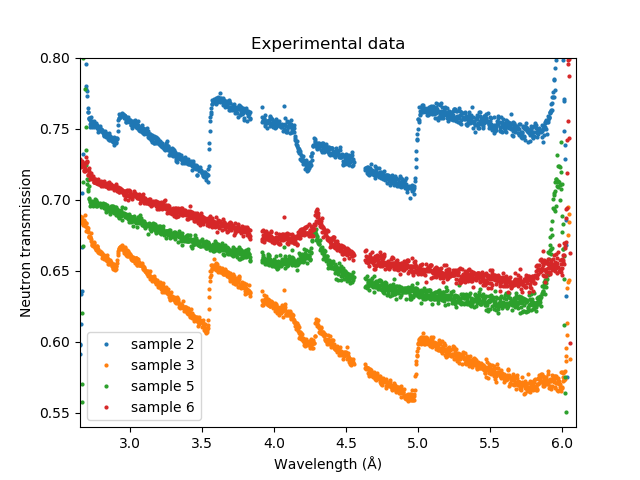

(0.54, 0.8)

In [4]:
x_type = 'lambda'
y_type = 'transmission'
exps = {}
ax0 = None

for _index, each_name in enumerate(sample_name):
    exps[each_name] = Experiment(spectra_file=spectra_file, data_file=data_file[_index], folder=folder)
    if norm_to_file is not None:
        exps[each_name].norm_to(file=norm_to_file[_index], norm_factor=norm_factor[_index])
    if ax0 is None:
        ax0 = exps[each_name].plot(x_type=x_type, y_type=y_type,
                                   source_to_detector_m=source_to_detector_m, offset_us=offset_us,
                                   logx=logx, baseline=baseline, deg=deg, fmt=fmt, lw=lw, label=each_name)
    else:
        ax0 = exps[each_name].plot(ax_mpl=ax0, x_type=x_type, y_type=y_type,
                                   source_to_detector_m=source_to_detector_m, offset_us=offset_us,
                                   logx=logx, baseline=baseline, deg=deg, fmt=fmt, lw=lw, label=each_name)

        # simu.plot(ax_mpl=ax0[i], x_type='energy', y_type='attenuation',
        #           source_to_detector_m=source_to_detector_m, offset_us=offset_us, logx=True,
        #           mixed=False, all_layers=False, all_elements=False, items_to_plot=[_ele],
        #           fmt='-.', lw=1, alpha=1)
# simu.plot(ax_mpl=ax0, x_type=x_type, y_type=y_type,
#           source_to_detector_m=source_to_detector_m, offset_us=offset_us,
#           logx=logx, mixed=False, all_layers=True, all_elements=False, #items_to_plot=['Ta'],
#              fmt='-', lw=1, alpha=0.5)

plt.xlim(2.65, 6.1)
plt.ylim(0.54, 0.8)

In [5]:
exps['sample 6'].offset_us

10000

In [6]:
exps['sample 2'].export(x_type=x_type, y_type=y_type)

,x,y
0,2.397806,0.270315
1,2.400261,0.274570
2,2.402716,0.271021
3,2.405171,0.267059
4,2.407626,0.263540
5,2.410082,0.275499
6,2.412537,0.266591
7,2.414992,0.263030
8,2.417447,0.266103
9,2.419902,0.267887


In [7]:
exps['sample 3'].export(x_type=x_type, y_type=y_type)

,x,y
0,2.397806,0.305012
1,2.400261,0.288078
2,2.402716,0.292203
3,2.405171,0.306286
4,2.407626,0.285076
5,2.410082,0.289376
6,2.412537,0.301365
7,2.414992,0.289798
8,2.417447,0.297732
9,2.419902,0.304986


In [8]:
exps['sample 5'].export(x_type=x_type, y_type=y_type)

,x,y
0,2.397806,0.203450
1,2.400261,0.184932
2,2.402716,0.194577
3,2.405171,0.189555
4,2.407626,0.181197
5,2.410082,0.191540
6,2.412537,0.192039
7,2.414992,0.186986
8,2.417447,0.195853
9,2.419902,0.207958


In [9]:
exps['sample 6'].export(x_type=x_type, y_type=y_type)

,x,y
0,2.397806,0.319259
1,2.400261,0.329944
2,2.402716,0.320074
3,2.405171,0.315328
4,2.407626,0.330575
5,2.410082,0.311139
6,2.412537,0.323633
7,2.414992,0.334388
8,2.417447,0.321024
9,2.419902,0.333416


<IPython.core.display.Javascript object>


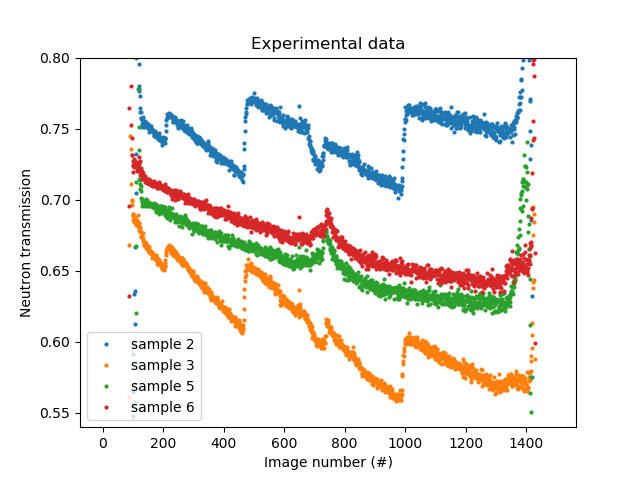

(0.54, 0.8)

In [6]:
x_type = 'number'
y_type = 'transmission'
exps = {}
ax1 = None

for _index, each_name in enumerate(sample_name):
    exps[each_name] = Experiment(spectra_file=spectra_file, data_file=data_file[_index], folder=folder)
    if norm_to_file is not None:
        exps[each_name].norm_to(file=norm_to_file[_index], norm_factor=norm_factor[_index])
    if ax1 is None:
        ax1 = exps[each_name].plot(x_type=x_type, y_type=y_type,
                                   source_to_detector_m=source_to_detector_m, offset_us=offset_us,
                                   logx=logx, baseline=baseline, deg=deg, fmt=fmt, lw=lw, label=each_name)
    else:
        ax1 = exps[each_name].plot(ax_mpl=ax1, x_type=x_type, y_type=y_type,
                                   source_to_detector_m=source_to_detector_m, offset_us=offset_us,
                                   logx=logx, baseline=baseline, deg=deg, fmt=fmt, lw=lw, label=each_name)

        # simu.plot(ax_mpl=ax0[i], x_type='energy', y_type='attenuation',
        #           source_to_detector_m=source_to_detector_m, offset_us=offset_us, logx=True,
        #           mixed=False, all_layers=False, all_elements=False, items_to_plot=[_ele],
        #           fmt='-.', lw=1, alpha=1)
# simu.plot(ax_mpl=ax0, x_type=x_type, y_type=y_type,
#           source_to_detector_m=source_to_detector_m, offset_us=offset_us,
#           logx=logx, mixed=False, all_layers=True, all_elements=False, #items_to_plot=['Ta'],
#              fmt='-', lw=1, alpha=0.5)

# plt.xlim(2.65, 6.1)
plt.ylim(0.54, 0.8)